# Importing of Packages

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC, LinearSVC - too slow
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier -  too slow
from sklearn.metrics import roc_auc_score, accuracy_score

# Reading in of Data

In [2]:
df = pd.read_csv("train.csv")

# Exploring our Dataset

In [4]:
print(df.head())
print(df.shape)

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  
(1150479

In [5]:
print(df.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [6]:
print(df.isna().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [7]:
print(df["Response"].value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64


In [8]:
print(df.describe())

                 id           Age  Driving_License   Region_Code  \
count  1.150480e+07  1.150480e+07     1.150480e+07  1.150480e+07   
mean   5.752398e+06  3.838356e+01     9.980220e-01  2.641869e+01   
std    3.321149e+06  1.499346e+01     4.443120e-02  1.299159e+01   
min    0.000000e+00  2.000000e+01     0.000000e+00  0.000000e+00   
25%    2.876199e+06  2.400000e+01     1.000000e+00  1.500000e+01   
50%    5.752398e+06  3.600000e+01     1.000000e+00  2.800000e+01   
75%    8.628598e+06  4.900000e+01     1.000000e+00  3.500000e+01   
max    1.150480e+07  8.500000e+01     1.000000e+00  5.200000e+01   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel       Vintage  \
count        1.150480e+07    1.150480e+07          1.150480e+07  1.150480e+07   
mean         4.629966e-01    3.046137e+04          1.124254e+02  1.638977e+02   
std          4.986289e-01    1.645475e+04          5.403571e+01  7.997953e+01   
min          0.000000e+00    2.630000e+03          1.000000e+00

In [9]:
print(pd.unique(df['Gender']))
print(pd.unique(df['Vehicle_Age']))
print(pd.unique(df['Vehicle_Damage']))

['Male' 'Female']
['1-2 Year' '> 2 Years' '< 1 Year']
['Yes' 'No']


# Encoding of Categorical Variables
We have a few categorical variables that we will need to encode in order for them to be useful for our machine learning techniques. These are `Gender`, `Vehicle_Age`, `Vehicle_Damage`. We will one hot encode them using `sklearn.preprocessing`'s `OneHotEncoder()`.

In [10]:
categorical_var = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

one_hot_encoded = encoder.fit_transform(df[categorical_var])
one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_var))

new_df = pd.concat([df, one_hot_df], axis = 1)
new_df = new_df.drop(categorical_var, axis = 1)

print(new_df.head())

   id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   0   21                1         35.0                   0         65101.0   
1   1   43                1         28.0                   0         58911.0   
2   2   25                1         14.0                   1         38043.0   
3   3   35                1          1.0                   0          2630.0   
4   4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 124.0      187         0          1.0                   0.0   
1                  26.0      288         1          1.0                   0.0   
2                 152.0      254         0          0.0                   1.0   
3                 156.0       76         0          0.0                   0.0   
4                 152.0      294         0          0.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicl

# Dropping of irrelevant features
We will drop the `id` column, since it does not provide us any useful information.

In [11]:
new_df = new_df.drop(['id'], axis = 1)
print(new_df.head())

   Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 124.0      187         0          1.0                   0.0   
1                  26.0      288         1          1.0                   0.0   
2                 152.0      254         0          0.0                   1.0   
3                 156.0       76         0          0.0                   0.0   
4                 152.0      294         0          0.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0        

# Splitting of Train & Test Data

In [12]:
X = new_df.drop('Response', axis = 1)
y = new_df[['Response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [13]:
print(X_train.head())
print(y_train.head())

   Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   57                1         28.0                   1         50503.0   
1   21                1         35.0                   0          2630.0   
2   40                1         28.0                   0         36699.0   
3   40                1         28.0                   1         42603.0   
4   21                1         34.0                   0         37170.0   

   Policy_Sales_Channel  Vintage  Gender_Male  Vehicle_Age_< 1 Year  \
0                  52.0       47          1.0                   0.0   
1                 154.0      164          1.0                   1.0   
2                 156.0      288          1.0                   0.0   
3                 124.0       67          0.0                   0.0   
4                 152.0      110          0.0                   1.0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                    0.0                 0.0  
1                    0

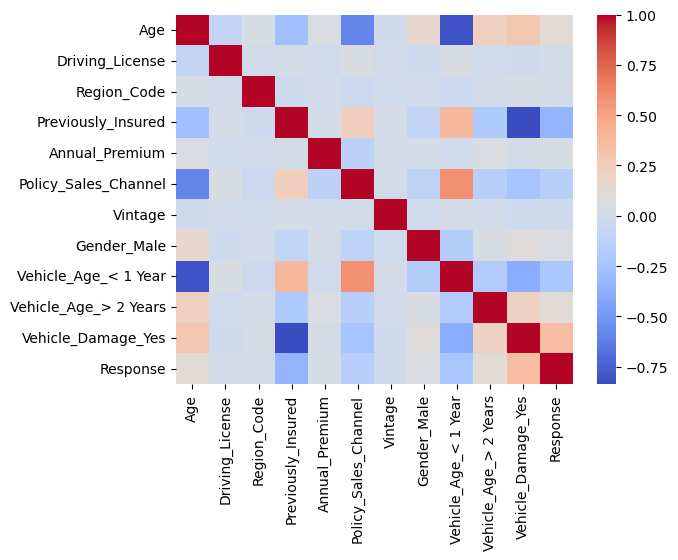

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
Age,1.000000,-0.078521,0.037117,-0.276367,0.056267,-0.591530,-0.013410,0.157556,-0.802761,0.221113,0.288186,0.122280
Driving_License,-0.078521,1.000000,-0.001308,0.013687,-0.007299,0.043072,-0.000413,-0.018678,0.039194,-0.006272,-0.015420,0.009251
Region_Code,0.037117,-0.001308,1.000000,-0.022293,-0.001910,-0.037707,-0.005619,-0.000072,-0.039081,0.014450,0.026291,0.012643
Previously_Insured,-0.276367,0.013687,-0.022293,1.000000,0.007704,0.237051,0.019295,-0.087495,0.376968,-0.192364,-0.836447,-0.345955
Annual_Premium,0.056267,-0.007299,-0.001910,0.007704,1.000000,-0.128671,0.003192,0.010676,-0.009903,0.055222,0.012557,0.032064
Policy_Sales_Channel,-0.591530,0.043072,-0.037707,0.237051,-0.128671,1.000000,0.009051,-0.115855,0.579777,-0.149434,-0.241367,-0.152790
Vintage,-0.013410,-0.000413,-0.005619,0.019295,0.003192,0.009051,1.000000,-0.009693,0.019118,-0.003619,-0.019306,-0.014891
Gender_Male,0.157556,-0.018678,-0.000072,-0.087495,0.010676,-0.115855,-0.009693,1.000000,-0.173095,0.045269,0.096976,0.055159
Vehicle_Age_< 1 Year,-0.802761,0.039194,-0.039081,0.376968,-0.009903,0.579777,0.019118,-0.173095,1.000000,-0.184082,-0.387035,-0.219723
Vehicle_Age_> 2 Years,0.221113,-0.006272,0.014450,-0.192364,0.055222,-0.149434,-0.003619,0.045269,-0.184082,1.000000,0.206755,0.111677


In [14]:
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr(), cmap='coolwarm')
plt.show()

pd.concat([X_train, y_train], axis = 1).corr()

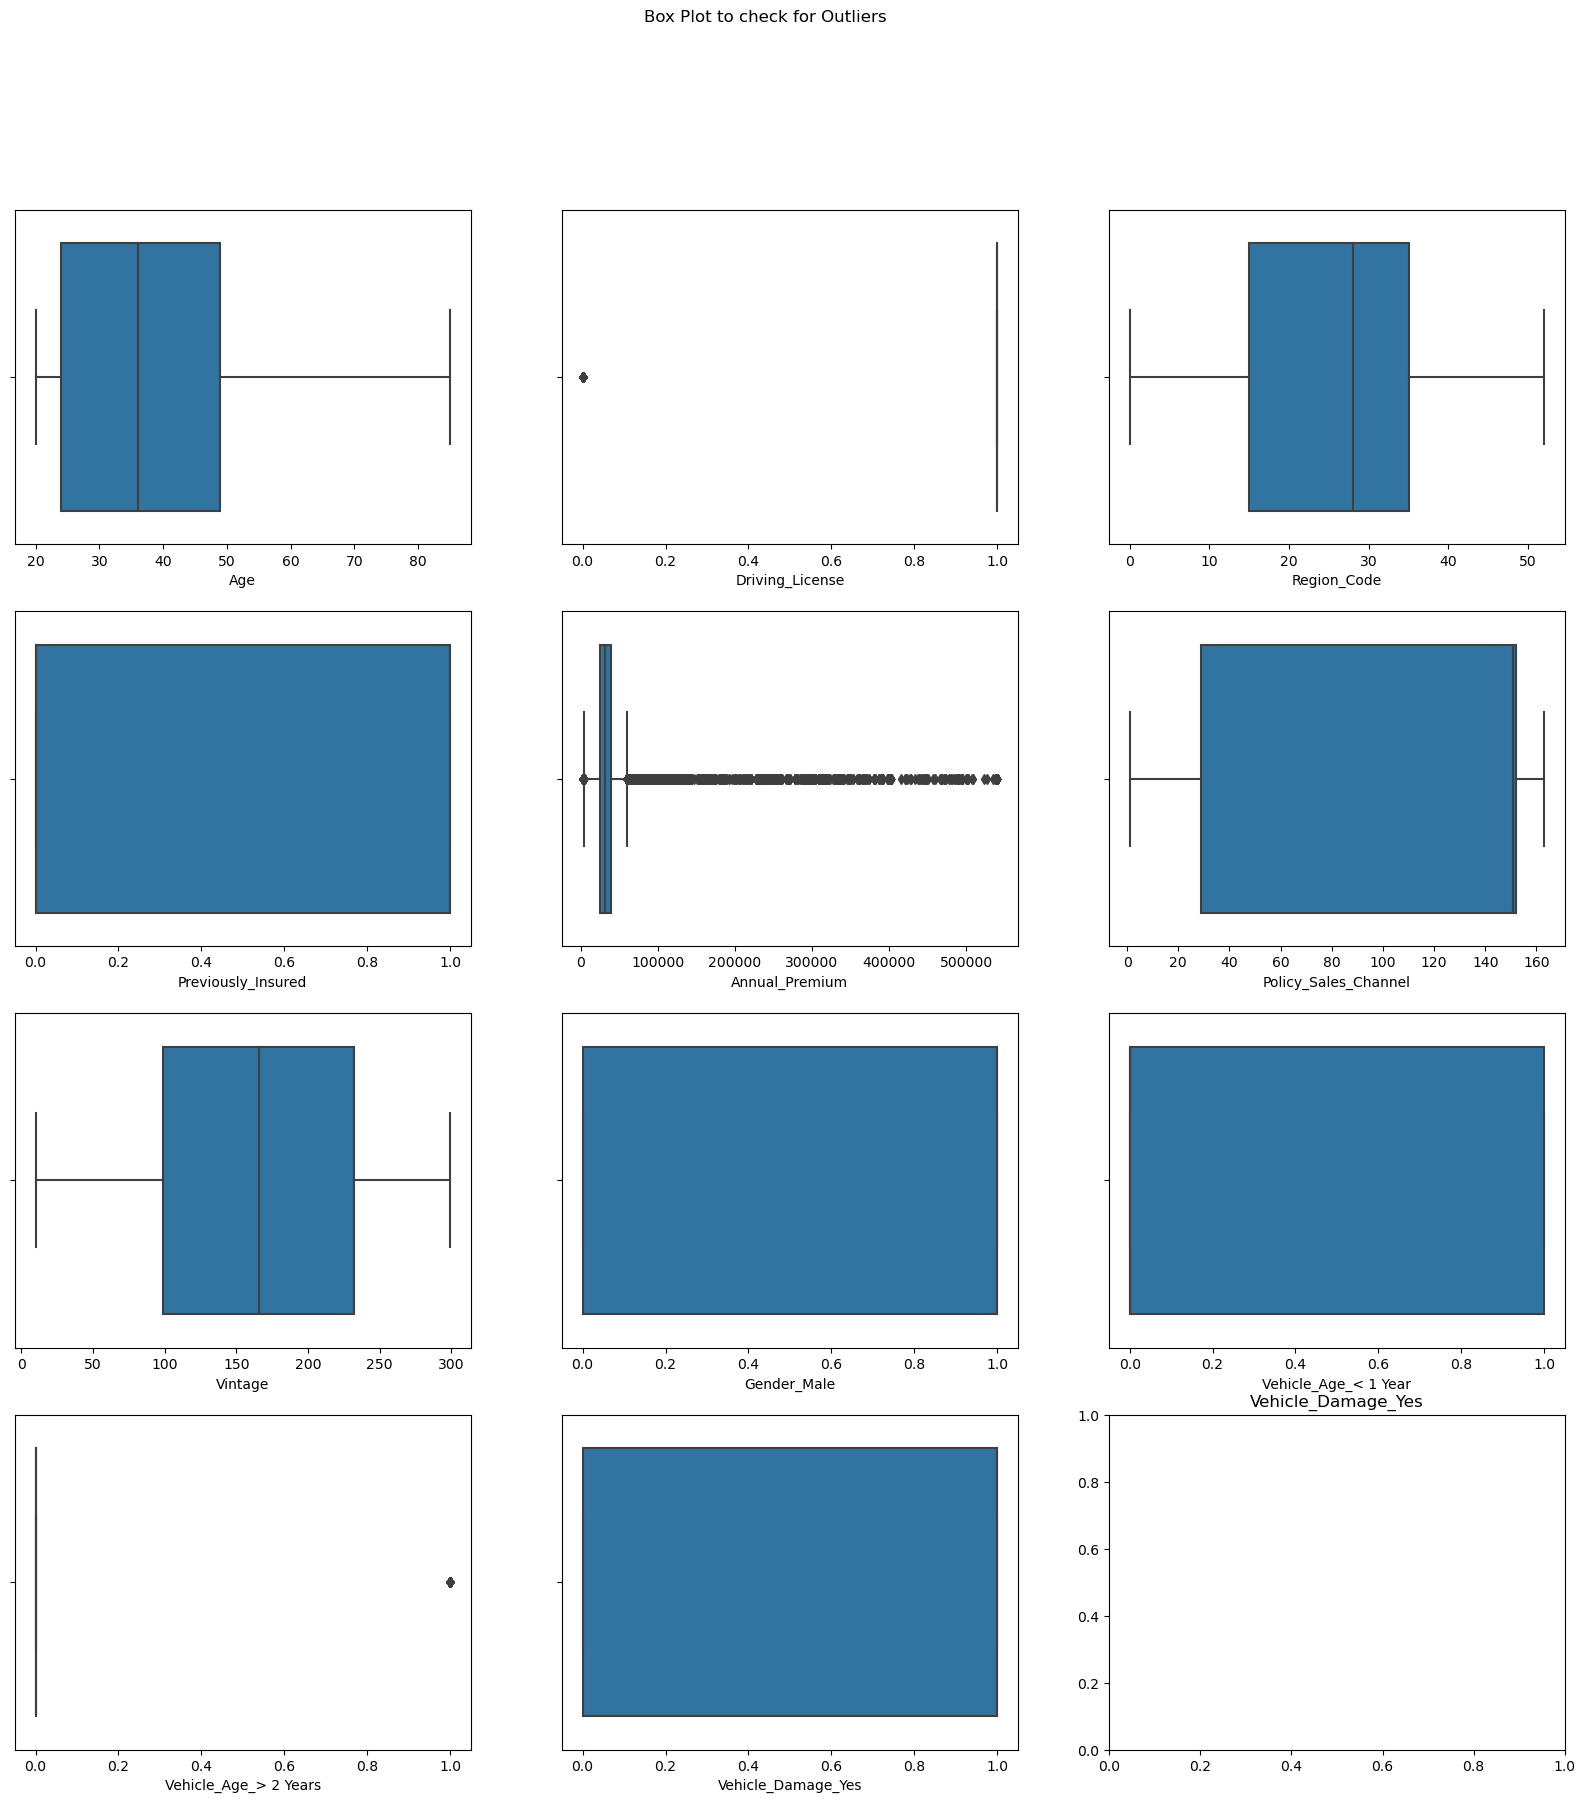

In [15]:
fig,ax = plt.subplots(4,3,figsize=(20,20))
ax = ax.flatten()
plt.suptitle('Box Plot to check for Outliers')
for i, column in enumerate(X_train.columns):
    sns.boxplot(data = X_train, x = column, ax = ax[i])
    plt.title(column)

# Scaling of Numerical features
We will use `sklearn.preprocessing`'s `StandardScaler()` to scale the numerical features, which are `Age`, `Region_Code`, `Annual_Premium`, `Policy_Sales_Channel`, `Vintage`.

In [16]:
num_var = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_var]), columns = num_var)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_var]), columns = num_var)

X_train[num_var] = X_train_num
X_test[num_var] = X_test_num

# Model Selection
We will use a variety of models to predict the `Response` variable. We will also use the Area Under ROC parameter to measure the robustness of the models.

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(n_jobs = -1),
#     "AdaBoost": AdaBoostClassifier(n_jobs = -1),
#     "Bagging": BaggingClassifier(n_jobs = -1),
#     "ExtraTrees": ExtraTreesClassifier()
}

model_results = {"Model":[],
                "ROC_AUC":[]}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).reshape(-1, 1)
    model_results["Model"].append(model_name)
    model_results["ROC_AUC"].append(roc_auc_score(y_test, y_pred))

results = pd.DataFrame(model_results)


C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:1301: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

In [18]:
print(results)

                 Model   ROC_AUC
0  Logistic Regression  0.500054
1     Ridge Classifier  0.500016
2       SGD Classifier  0.500000
3  K Nearest Neighbors  0.578301
4          Naive Bayes  0.792266
5        Decision Tree  0.622570


# Neural Networks
We will implement a neural network using Python's `pytorch` package

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

In [23]:
X_train_nn = torch.tensor(X_train.to_numpy(), dtype = torch.float32)
y_train_nn = torch.tensor(y_train.to_numpy(), dtype = torch.float32).reshape(-1, 1)

## Model Definitions
We have 11 features in `X_train`, so we will start with an input layer of 11 neurons.

In [24]:
model = nn.Sequential(
    nn.Linear(11, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(num_features = 16),
    nn.Dropout(0.25),
    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.BatchNorm1d(num_features = 8),
    nn.Dropout(0.25),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=12, out_features=16, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.25, inplace=False)
  (8): Linear(in_features=8, out_features=1, bias=True)
  (9): Sigmoid()
)


In [52]:
class InsuranceClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(11, 16)
        self.bn1 = nn.BatchNorm1d(num_features = 16)
        self.act1 = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.25)
        self.hidden2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(num_features = 8)
        self.act2 = nn.LeakyReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
    
    def forward(self, x):
        x = self.act1(self.dropout(self.bn1(self.hidden1(x))))
        x = self.act2(self.dropout(self.bn2(self.hidden2(x))))
        x = self.act_output(self.output(x))
        return x
    
nn_clf = InsuranceClassifier()
print(nn_clf)

InsuranceClassifier(
  (hidden1): Linear(in_features=11, out_features=16, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.25, inplace=False)
  (hidden2): Linear(in_features=16, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [53]:
loss_fn = nn.BCELoss()
opt_fn = torch.optim.Adam(nn_clf.parameters(), lr = 0.001)

n_epochs = 10
batch_size = 1000000

for epoch in range(n_epochs):
    for i in range(0, len(X_train_nn), batch_size):
        X_batch = X_train_nn[i:i+batch_size]
        y_pred = nn_clf(X_batch)
        y_batch = y_train_nn[i:i+batch_size]
        loss = loss_fn(y_pred, y_batch)
        opt_fn.zero_grad()
        loss.backward()
        opt_fn.step()
    print(f'Completed Epoch {epoch}, loss: {loss}')

Completed Epoch 0, loss: 0.7547428607940674
Completed Epoch 1, loss: 0.7259994745254517
Completed Epoch 2, loss: 0.7003945708274841
Completed Epoch 3, loss: 0.6750350594520569
Completed Epoch 4, loss: 0.6521381139755249


In [54]:
X_test_nn = torch.tensor(X_test.to_numpy(), dtype = torch.float32)
y_pred = nn_clf(X_test_nn).round().detach().numpy()

print(type((y_pred)))
print(type(y_test))

print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#print(roc_auc_score(y_t))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
0.6576269821641072
0.6070583582504694
